# 2 player quantum game

In [34]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
payoff_list=[]
X=[]
Y=[]
for i in range(1,210,10):
    for j in range(1,200,10):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = 0 # extend of entanglement(can be varied from 0 to pi/2)
        circuit1.x(0)  #C = 1
        circuit1.x(1)  #C = 1
 ####################################################
 #j gate
        circuit1.rx(-np.pi/2,0) 
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
 ####################################################
        
        if i <100:             #apply different strategy (theta can be varied from 0 to pi and phi can be varied from 0 to pi/2)
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
 #####################################################
 #strategy gate
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
 #####################################################  
 #j dagger gate
        circuit1.squ(U1, q[0])   
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"): #CC state
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"): #DC state
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"): #CD state
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"): #DD state
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list.append(payoff[0])
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
circuit1.draw()

┌───┐┌───────────┐                             ┌──────────┐»
q44521_0: ┤ X ├┤ RX(-pi/2) ├──■───────────────────────■──┤ RX(pi/2) ├»
          ├───┤├───────────┤  │                       │  ├──────────┤»
q44521_1: ┤ X ├┤ RX(-pi/2) ├──┼────■─────────────■────┼──┤ RX(pi/2) ├»
          └───┘└───────────┘┌─┴─┐┌─┴─┐┌───────┐┌─┴─┐┌─┴─┐└──────────┘»
q44521_2: ──────────────────┤ X ├┤ X ├┤ RZ(0) ├┤ X ├┤ X ├────────────»
                            └───┘└───┘└───────┘└───┘└───┘            »
 c6361: 2/═══════════════════════════════════════════════════════════»
                                                                     »
«          ┌─────────┐┌───────────┐                             ┌──────────┐   »
«q44521_0: ┤ UNITARY ├┤ RX(-pi/2) ├──■───────────────────────■──┤ RX(pi/2) ├───»
«          ├─────────┤├───────────┤  │                       │  ├──────────┤┌─┐»
«q44521_1: ┤ UNITARY ├┤ RX(-pi/2) ├──┼────■─────────────■────┼──┤ RX(pi/2) ├┤M├»
«          └─────────┘└───────────┘┌─┴─┐┌─┴─┐┌───────┐┌─┴─┐┌─┴─┐└──────────┘└╥┘»
«q44521_2: ────────────────────────┤ X ├┤ X ├┤ RZ(0) ├┤ X ├┤ X ├─────────────╫─»
«                                  └───┘└───┘└───────┘└───┘└───┘             ║ »
« c6361: 2/══════════════════════════════════════════════════════════════════╩═»
«                                                                            1 »
«          ┌─┐
«q44521_0: ┤M├
«          └╥┘
«q44521_1: ─╫─
«           ║ 
«q44521_2: ─╫─
«           ║ 
« c6361: 2/═╩═
«           0

Text(0.5, 0, 'alice payoff')

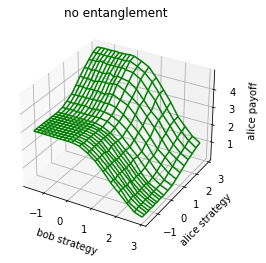

In [35]:
#change X, Y, and Z to the format of a matplotlib graph
# the result below is no entanglement
X_change = X[: 20]
X = []
for i in range(20):
    X.append(X_change)
X = np.array(X)

Y_change = []
for i in range(20):
    Y_change.append(Y[i*20])

Y = []
for i in range(20):
    Y_change2 = []
    for j in range(20):
        Y_change2.append(Y_change[i])
    Y.append(Y_change2)
Y = np.array(Y)
Z = []
for i in range(20):
    Z_change = payoff_list[i*20:(i+1)*20]
    Z.append(Z_change)
Z = np.array(Z)
#plot the figure
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X, Y, Z, color ='green') 
ax.set_title('no entanglement'); 
ax.set_xlabel('bob strategy')
ax.set_ylabel('alice strategy')
ax.set_zlabel('alice payoff')

# maximum entanglement

Text(0.5, 0, 'alice payoff')

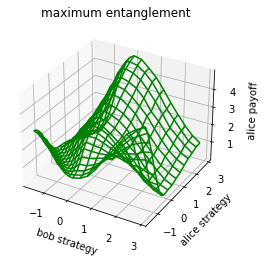

In [37]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
payoff_list=[]
X=[]
Y=[]
for i in range(1,210,10):
    for j in range(1,200,10):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/2
        circuit1.x(0) 
        circuit1.x(1)  
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        if i <100:
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list.append(payoff[0])
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X_change = X[: 20]
X = []
for i in range(20):
    X.append(X_change)
X = np.array(X)

Y_change = []
for i in range(20):
    Y_change.append(Y[i*20])

Y = []
for i in range(20):
    Y_change2 = []
    for j in range(20):
        Y_change2.append(Y_change[i])
    Y.append(Y_change2)
Y = np.array(Y)
Z = []
for i in range(20):
    Z_change = payoff_list[i*20:(i+1)*20]
    Z.append(Z_change)
Z = np.array(Z)
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X, Y, Z, color ='green') 
ax.set_title('maximum entanglement'); 
ax.set_xlabel('bob strategy')
ax.set_ylabel('alice strategy')
ax.set_zlabel('alice payoff')

# half entanglement

Text(0.5, 0, 'alice payoff')

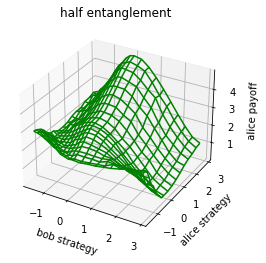

In [38]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
payoff_list=[]
X=[]
Y=[]
for i in range(1,210,10):
    for j in range(1,200,10):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/4
        circuit1.x(0)  
        circuit1.x(1)  
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        if i <100:
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list.append(payoff[0])
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X =np.array(X)
Y =np.array(Y)
X = []
Y = []
for i in range(1,210,10):
    for j in range(1,200,10):
        if i <100:
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
X_change = X[: 20]
X = []
for i in range(20):
    X.append(X_change)
X = np.array(X)
Y_change = []
for i in range(20):
    Y_change.append(Y[i*20])
Y = []
for i in range(20):
    Y_change2 = []
    for j in range(20):
        Y_change2.append(Y_change[i])
    Y.append(Y_change2)
Y = np.array(Y)
Z = []
for i in range(20):
    Z_change = payoff_list[i*20:(i+1)*20]
    Z.append(Z_change)
Z = np.array(Z)
fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X, Y, Z, color ='green') 
ax.set_title('wireframe geeks for geeks'); 
ax.set_title('half entanglement'); 
ax.set_xlabel('bob strategy')
ax.set_ylabel('alice strategy')
ax.set_zlabel('alice payoff')

Text(0.5, 0, 'bob payoff')

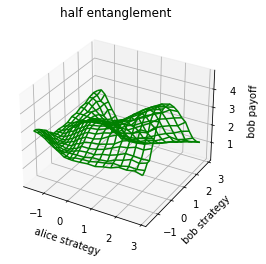

In [39]:
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
payoff_list=[]
X=[]
Y=[]
for i in range(1,210,10):
    for j in range(1,200,10):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/4
        circuit1.x(0)  #C = 1
        circuit1.x(1)  #C = 1
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        if i <100:
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list.append(payoff[1])
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

X =np.array(X)
Y =np.array(Y)
X = []
Y = []
for i in range(1,210,10):
    for j in range(1,200,10):
        if i <100:
            theta1=0
            phi1=np.pi/2*((i-100)/100)
            Y.append(phi1)
        else:
            theta1=np.pi*(i-100)/100
            phi1=0
            Y.append(theta1)
        if j <100:
            theta2=0
            phi2=np.pi/2*((j-100)/100)
            X.append(phi2)
        else:
            theta2=np.pi*(j-100)/100
            phi2=0
            X.append(theta2)
X_change = X[: 20]
X = []
for i in range(20):
    X.append(X_change)
X = np.array(X)
Y_change = []
for i in range(20):
    Y_change.append(Y[i*20])
Y = []
for i in range(20):
    Y_change2 = []
    for j in range(20):
        Y_change2.append(Y_change[i])
    Y.append(Y_change2)
Y = np.array(Y)
Z = []
for i in range(20):
    Z_change = payoff_list[i*20:(i+1)*20]
    Z.append(Z_change)
Z = np.array(Z)

fig = plt.figure() 
ax = plt.axes(projection ='3d') 
ax.plot_wireframe(X, Y, Z, color ='green') 
ax.set_title('half entanglement'); 
ax.set_xlabel('alice strategy')
ax.set_ylabel('bob strategy')
ax.set_zlabel('bob payoff')

In [40]:
print("based on the above two graph, we guess alice play (0, pi/2) and bob plays (pi,0) could be a nash equilibrium ")

based on the above two graph, we guess alice play (0, pi/2) and bob plays (pi,0) could be a nash equilibrium 


# Discussion about maxmin value

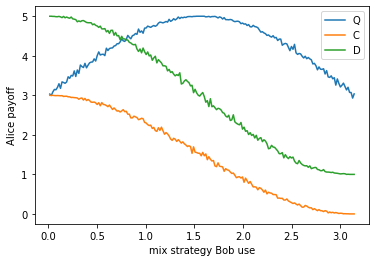

In [17]:
# player one use Quantum strategy , while player two use Classical strategy. The best response of player one is to play M(pi/2,pi/2)
# We also plot the circumstance when player one use classical domain strategy, C and D, for comparison.
import random
import qiskit
import numpy as np
from qiskit import QuantumCircuit , execute , Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram , plot_bloch_multivector
from math import sqrt , pi
payoff_list=[]
X=[]
Y=[]
P=[]
for i in range(1,201):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/2
        circuit1.x(0)
        circuit1.x(1)  
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        theta1=np.pi*i/200
        P.append(theta1)
        phi1=0
        theta2=np.pi/2
        phi2=np.pi/2
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list.append(payoff[1])
payoff_list1=[]
P1=[]
for i in range(1,201):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/2
        circuit1.x(0)  #C = 1
        circuit1.x(1)  #C = 1
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        theta1=np.pi*i/200
        P1.append(theta1)
        phi1=0
        theta2=0
        phi2=0
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list1.append(payoff[1])

payoff_list2=[]

P2=[]
for i in range(1,201):
        q=QuantumRegister(3)
        c = ClassicalRegister(2)
        circuit1 = QuantumCircuit(q,c)

        r = np.pi/2
        circuit1.x(0)  #C = 1
        circuit1.x(1)  #C = 1
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        theta1=np.pi*i/200
        P2.append(theta1)
        phi1=0
        theta2=np.pi
        phi2=0
        U1=np.array([[np.exp(phi1*1j)*np.cos(theta1/2),np.sin(theta1/2)],[-np.sin(theta1/2),np.exp(-phi1*1j)*np.cos(theta1/2)]])
        U2=np.array([[np.exp(phi2*1j)*np.cos(theta2/2),np.sin(theta2/2)],[-np.sin(theta2/2),np.exp(-phi2*1j)*np.cos(theta2/2)]])
        circuit1.squ(U1, q[0])
        circuit1.squ(U2, q[1])
        circuit1.rx(-np.pi/2,0)
        circuit1.rx(-np.pi/2,1)
        circuit1.cx(q[0],q[2])
        circuit1.cx(q[1],q[2])
        circuit1.rz(-r,q[2])
        circuit1.cx(q[1],q[2])
        circuit1.cx(q[0],q[2])
        circuit1.rx(np.pi/2,1)
        circuit1.rx(np.pi/2,0)
        circuit1.measure([0,1],[0,1])
        circuit1.draw()
        backend = Aer.get_backend('qasm_simulator')
        shots = 1024
        results = execute(circuit1, backend=backend, shots=shots).result()
        answer = results.get_counts()
        payoff_matrix=np.array(
        [[3,3],[0,5],[5,0],[1,1]]
            )
        payoff=0
        for k in answer:
            if (k=="11"):
                payoff=payoff+payoff_matrix[0]*answer[k]/shots
            if (k=="10"):
                payoff=payoff+payoff_matrix[2]*answer[k]/shots
            if (k=="01"):
                payoff=payoff+payoff_matrix[1]*answer[k]/shots
            if (k=="00"):
                payoff=payoff+payoff_matrix[3]*answer[k]/shots
        payoff_list2.append(payoff[1])
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
circuit1.draw()
plt.plot(P,payoff_list, label="Q")
plt.plot(P1,payoff_list1, label="C")
plt.plot(P2,payoff_list2, label="D")
plt.ylabel('Alice payoff')
plt.xlabel('mix strategy Bob use')
plt.legend()
plt.show()